Grip@The Sparks Foundation

Task 2:Prediction using Unsupervised Learning

Author:Kacem Rania

#importing the required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

#creating the dataframe


In [5]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#DataFrame Description


In [7]:
print("The number of rows: ",iris_df.shape[0])
print("The number of columns: ",iris_df.shape[1])

The number of rows:  150
The number of columns:  4


In [8]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
iris_df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

#visualising the data


Text(0.5, 1.0, 'Sepal Length wise count')

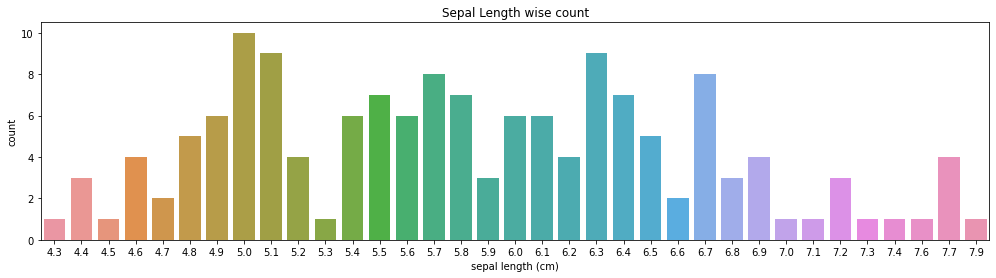

In [26]:
sl=iris_df["sepal length (cm)"]
plt.figure(figsize=(17,4))
sns.countplot(data=sl,x=sl[0:sl.shape[0]])
plt.title("Sepal Length wise count")

Text(0.5, 1.0, 'Sepal width wise count')

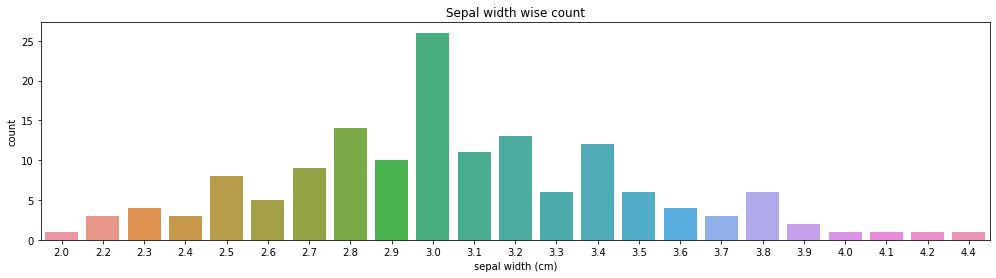

In [27]:
sw=iris_df["sepal width (cm)"]
plt.figure(figsize=(17,4))
sns.countplot(data=sw,x=sw[0:sw.shape[0]])
plt.title("Sepal width wise count")

Text(0.5, 1.0, 'Petal length wise count')

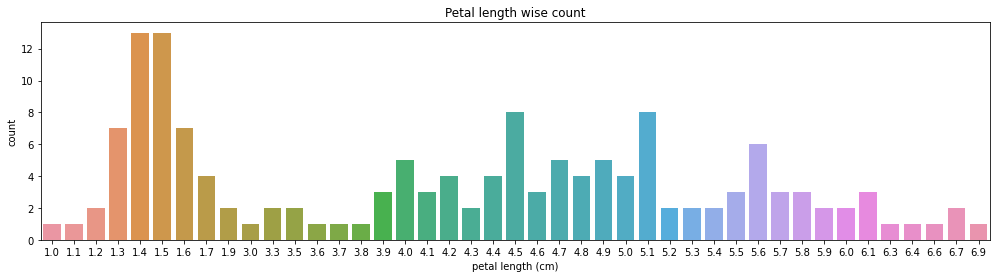

In [29]:
pl=iris_df["petal length (cm)"]
plt.figure(figsize=(17,4))
sns.countplot(data=pl,x=pl[0:pl.shape[0]])
plt.title("Petal length wise count")

Text(0.5, 1.0, 'Petal width wise count')

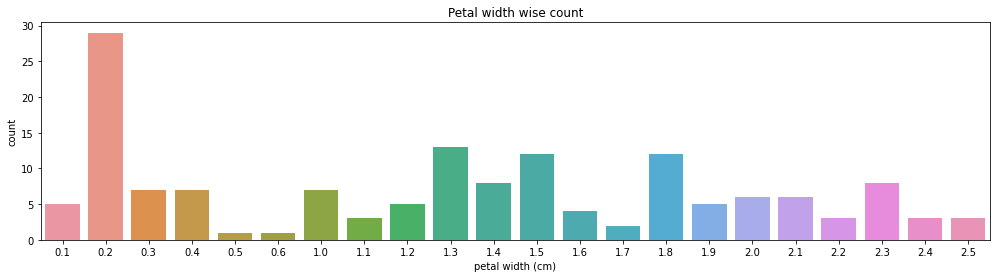

In [31]:
pw=iris_df["petal width (cm)"]
plt.figure(figsize=(17,4))
sns.countplot(data=pw,x=pw[0:pw.shape[0]])
plt.title("Petal width wise count")

#Correlation Heatmap

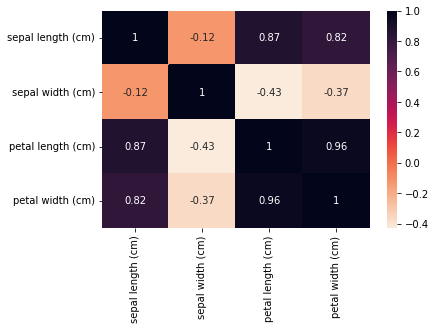

In [32]:
sns.heatmap(iris_df.corr(),cmap='rocket_r',annot=True)

#Covariance Heatmap

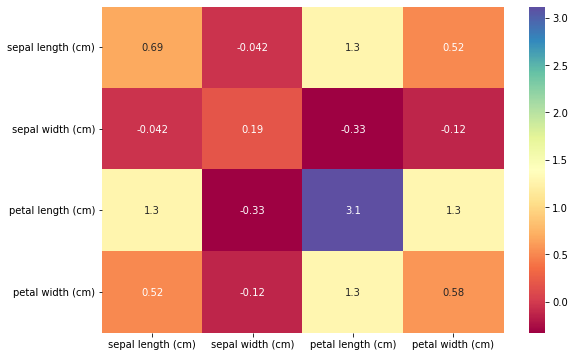

In [33]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(iris_df.cov(), annot= True, cmap= 'Spectral')
plt.show()


#Finding the number of clusters

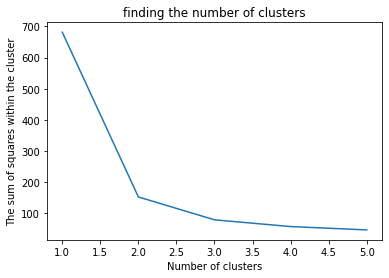

In [34]:
x=iris_df.iloc[:,:].values
from sklearn.cluster import KMeans
lis=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=200,n_init=15,random_state=0)
    kmeans.fit(x)
    lis.append(kmeans.inertia_)
#the relation between number of clusters and the sum of squares
plt.plot(range(1,6),lis)
plt.title("finding the number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("The sum of squares within the cluster")
plt.show()

In [36]:
#the optimum number of clusters is basically when the sum of squares doesnt decrease significantly after iteration
#so we choose 3 as the number of clusters
kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=200,n_init=15,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 4, 3, 1, 4, 4, 1, 0, 1, 4, 1,
       4, 4, 4, 3, 4, 4, 4, 1, 1, 3, 4, 3, 1, 3, 4, 1, 3, 3, 4, 1, 1, 1,
       4, 3, 3, 1, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

In [37]:
#display each data point belongs to which cluster
df_new=pd.DataFrame(x)
df_new['Cluster'] = pd.Series(y_kmeans, index=df_new.index)
df_new

,0,1,2,3,Cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


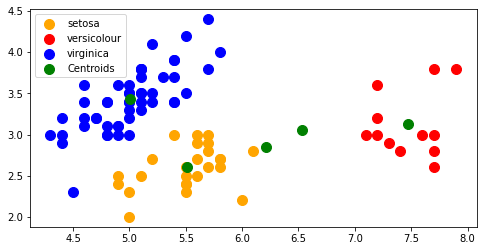

In [42]:
#cluster 0
plt.figure(figsize=(8,4))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="orange",label="setosa")
#cluster 1
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="red",label="versicolour")
#cluster 2
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="blue",label="virginica")
#centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="green",label="Centroids")
plt.legend()